# Linear regression

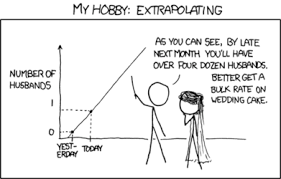


In [2]:
%%capture
!pip install statsmodels
!pip install sklearn

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

# Table of Contents

## Simple linear regression

Simple linear regression an statistical model that assumes a linear relationship between one predictor and one target variable. Mathematically, this can be expressed as:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Where:
 * $X$ = predictor variable
 * $Y$ = target variable
 * $\beta_0$ = intercept
 * $\beta_1$ = slope
 * $\epsilon$ = noise (Gaussian)


The above equation is known as the *population regression line*.

In [4]:
# From the example in the previous class
beta_1 =  0.08#0.08
beta_0 = 12
num_points = 100
X = np.random.normal(600, 150, num_points) # study hours

# And the grades are...
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
data = pd.DataFrame({'grade': y,
                     'hours': X})

In [5]:
data

,grade,hours
0,50.182706,437.155410
1,62.078706,749.601817
2,66.957065,642.446775
3,54.915983,374.055793
4,52.933667,513.209962
...,...,...
95,56.218098,754.667169
96,45.638718,437.314813
97,43.084088,395.479268
98,62.846499,656.910092


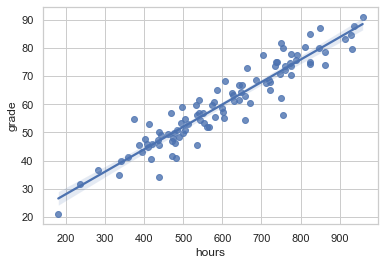

In [6]:
sns.regplot(x='hours', y='grade', data=data);

Of course, in the real life we don´t know the true parameters of the model, neither if the model is real!!! Today we´ll learn a [valuable lesson](https://en.wikipedia.org/wiki/All_models_are_wrong):



<center> <b>"All models are wrong, but some are useful"</b> </center>


In practice what we do is, after seing an scatter plot as the one above, try to infer the parameters of the model $\beta_0$ and the slope, $\beta_1$.  Once they are estimated, the estimated fit becomes $$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

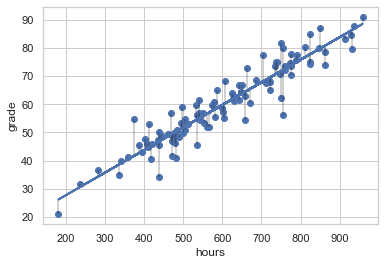

In [7]:
# regression line
y_hat = 11.75 + 0.08 * X
# plot the linear fit on top of the scatter
plt.scatter(X, y)
plt.plot(X, y_hat, lw=2)
plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel('hours')
plt.ylabel('grade')
plt.show()


The numeric difference between the *least squares regression line* and the true value is called the *residual*, and represents the error in the estimate: $e = y_i  - \hat{y}$. The regression line minimized the *Residual Sum of Squares* (RSS): $$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$



### How good are our estimates?

The theory stablishes that the coefficients we find via the least squares method are **unbiased**, that is, the don´t systematically over or underestimate the true values.

There are also formulas to estimate the **Standard Error** of the estimates $SE(\hat{\beta_0})$ and $SE(\hat{\beta_1})$, from which we can obtain the $95\%$ confidence intervals as:


$$\hat\beta \pm 2*SE(\hat{\beta})$$



In [8]:
lr = LinearRegression()

In [9]:
#generate data
beta_1_hat_dist = []
beta_0_hat_dist = []

for _ in range(1000):
    beta_1 =  0.08
    beta_0 = 12
    num_points = 100
    X = np.random.normal(600, 150, num_points) # study hours

    # And the grades are...
    y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
    data = pd.DataFrame({'grade': y,
                         'hours': X})
    # Compute confidence intervals with the resampling technique (will check results later)
    lr.fit(X=data.hours.to_frame(),
           y=data.grade)

    beta_1_hat_dist.append(lr.coef_[0])
    beta_0_hat_dist.append(lr.intercept_)

In [10]:
# confidence intervals
params = beta_1_hat_dist
i_min = pd.Series(params).quantile(0.025)
i_max = pd.Series(params).quantile(0.975)
print(f'The 95% confidence interval is: {np.round(i_min,3), np.round(i_max, 3)}')

The 95% confidence interval is: (0.074, 0.086)


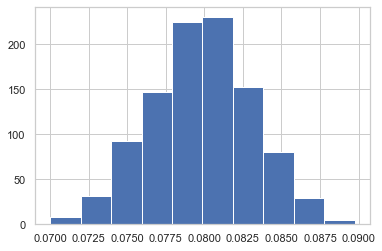

In [11]:
plt.hist(params)
plt.show()

### Can we safely conclude that there is a true relationship between X and y?


If the standard error is large and the estimated value small we can not be sure that its true value is really different from zero --- i.e. not statistically significant. Luckily for us we know about Hypothesis testing!!


* Null hypothesis $H_0: \beta_1 = 0 $
* Alternative hypothesis $H_a: \beta_1 \ne 0$

To test this we compute a *t-statistic* which measures the how many standard errors our parameter is away from 0:

$$t=\frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$$


Statisticians have worked out what the distribution of this statistic is under the null hypothesys --- a t-distrubution, not very imaginative. Knowing this distribution we ca determine the probability our results are due to chance. You alredy know that, we can calcualte the **p-value**.

**CAUTION!** here is another [video](https://www.youtube.com/watch?v=0Rnq1NpHdmw) to remind you the dangers of the p-values: 

In [12]:
# From the example in the previous class
beta_1 =  0.08 #0.08
beta_0 = 12
num_points = 100
X = np.random.normal(600, 150, num_points) # study hours

# And the grades are...
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
data = pd.DataFrame({'grade': y,
                     'hours': X})

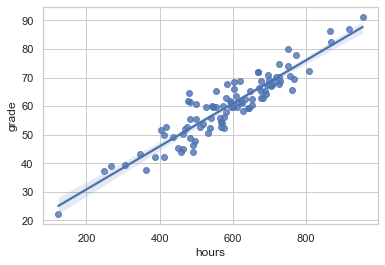

In [13]:
sns.regplot(x='hours', y='grade', data=data);

In [14]:
# Based on the distributions found 
params = beta_1_hat_dist
i_min = pd.Series(params).quantile(0.025)

### How good is our model?
No matter how significant our parameters are... if the model is terrible! 


If just use the mean as the predicted value for each predicion, the error we would make is (*total sum of squares*):

$$TTS=\Sigma(y_i - \bar{y}_i)^2$$

We will consider this our baseline.

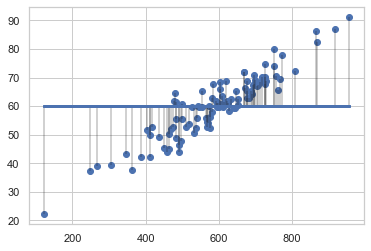

In [15]:
# show mean prediction
mean_prediction = [data.grade.mean()] * num_points
plt.scatter(X, y)
plt.plot(X, mean_prediction, lw=3)
plt.vlines(X, mean_prediction, y, lw=0.4)
plt.show()

In [16]:
# Calculate TSS for the above model
TSS = ((data.grade - mean_prediction) ** 2).sum()
TSS

12878.884745984724

Recall that the coeficients of the linear regression minimize the $RSS=\Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that is left unexplained after performing the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1- \frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained using X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is just the squeared of the *Pearson´s* correlation coefficient we already know. 

In [17]:
# Calculate the R^2 of the above model

lr.fit(X=data.hours.to_frame(), y=data.grade)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
    
y_hat = beta_0 + beta_1 * data.hours

RSS = ((data.grade - y_hat) ** 2).sum()

In [18]:
beta_1

0.07532372522175954

In [19]:
# R^2
(TSS - RSS) / (TSS)

0.8579044786158855

### Linear regression with statsmodels

To analyse linear models, we will be using the [statsmodels library](http://statsmodels.sourceforge.net/) which gives us a lot information  in a simple summary, and integrates nicely with pandas.

In [20]:
results = smf.ols('grade ~ hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     591.7
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           2.60e-43
Time:                        12:13:00   Log-Likelihood:                -287.24
No. Observations:                 100   AIC:                             578.5
Df Residuals:                      98   BIC:                             583.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7831      1.873      8.424      0.000      12.065      19.501
hours          0.0753      0.003     24.324      0.000       0.069       0.081
==============================================================================
Omnibus:                        3.642   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                3.568
Skew:                           0.456   Prob(JB):                        0.168
Kurtosis:                       2.849   Cond. No.                     2.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple linear regression

Of course, the hours one studies is not the only important factor to get good grades. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 +  \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m   + \epsilon$$


In [21]:
# From the example in the previous class
beta_2 = -0.02 # party hours
beta_1 = 0.08 #0.08 # hours studying
beta_0 = 11.75
num_points = 100
X_1 = np.random.normal(500, 200, num_points)
X_2 = np.random.normal(500, 200, num_points)

#
y = (beta_0) + (beta_1 * X_1) + (beta_2 * X_2)  + (np.random.normal(loc=0,scale=5,size=num_points))

In [22]:
data = pd.DataFrame({'grades':y, 
                     'study_hours': X_1,
                     'party_hours': X_2})

In [23]:
data

,grades,study_hours,party_hours
0,21.137187,251.876922,631.949658
1,39.729448,453.114167,528.033116
2,52.423200,594.307050,361.657413
3,43.411710,605.569393,602.621791
4,13.527008,191.436220,410.216518
...,...,...,...
95,65.994383,723.228693,693.498197
96,56.084981,687.479364,478.855086
97,33.503204,358.321376,287.768620
98,42.989335,420.797937,229.090229


The coefficients of the multiple linear regression are computed similar to the simple linear regression case: they minimize:

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{\beta_0} +  \hat{\beta_1 X_1} + \hat{\beta_2} X_2 + \dots + \hat{\beta_2} X_m$$


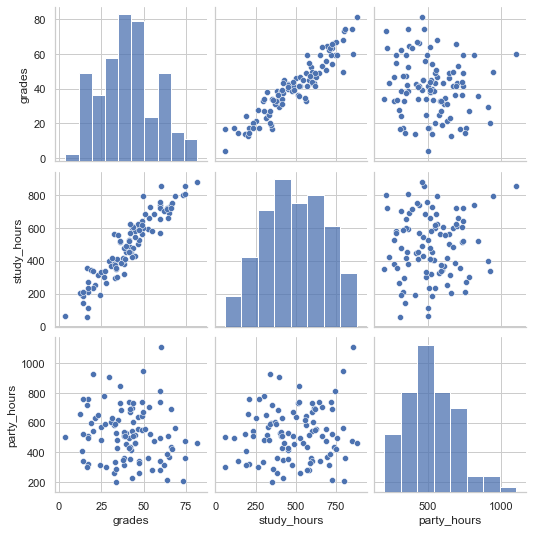

In [24]:
sns.pairplot(data);

/Users/juanmarin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
/Users/juanmarin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.


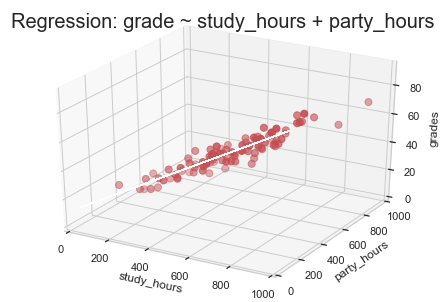

In [25]:
# Create plot
hours = np.arange(0,1000)
iq = np.arange(80,120)

B1, B2 = np.meshgrid(hours, iq, indexing='xy')
Z = np.zeros((iq.size, hours.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =(beta_0 + B1[i,j]*beta_1 + B2[i,j]*beta_2)

fig = plt.figure()
fig.suptitle('Regression: grade ~ study_hours + party_hours', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, cmap=cm.coolwarm, alpha=0.01, )
ax.scatter3D(X_1, X_2, y , c='r', s=50)

ax.set_xlabel('study_hours')
ax.set_xlim(0,1000)
ax.set_ylabel('party_hours')
ax.set_ylim(ymin=0, ymax=1000)
ax.set_zlabel('grades');

In [26]:
results = smf.ols('grades ~ study_hours + party_hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     555.1
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           7.79e-54
Time:                        12:13:04   Log-Likelihood:                -295.56
No. Observations:                 100   AIC:                             597.1
Df Residuals:                      97   BIC:                             604.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.7907      1.817      6.488      0.000       8.184      15.398
study_hours     0.0812      0.002     33.001      0.000       0.076       0.086
party_hours    -0.0202      0.003     -7.603      0.000      -0.025      -0.015
==============================================================================
Omnibus:                        0.302   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.436
Skew:                          -0.115   Prob(JB):                        0.804
Kurtosis:                       2.772   Cond. No.                     2.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The null hypothesis expands here to say that all coefficients are equal to 0. The alternative is only that at least one of them is significant. An F test is performed to test for significance.
$$ F = \frac{(SST - SSE)/p}{SSE / (n - p - 1)}$$

In [27]:
data

,grades,study_hours,party_hours
0,21.137187,251.876922,631.949658
1,39.729448,453.114167,528.033116
2,52.423200,594.307050,361.657413
3,43.411710,605.569393,602.621791
4,13.527008,191.436220,410.216518
...,...,...,...
95,65.994383,723.228693,693.498197
96,56.084981,687.479364,478.855086
97,33.503204,358.321376,287.768620
98,42.989335,420.797937,229.090229


# Categorical variables

In [29]:
data['sex'] = np.random.choice(['M','F'], num_points)
data

,grades,study_hours,party_hours,sex
0,21.137187,251.876922,631.949658,F
1,39.729448,453.114167,528.033116,F
2,52.423200,594.307050,361.657413,M
3,43.411710,605.569393,602.621791,M
4,13.527008,191.436220,410.216518,F
...,...,...,...,...
95,65.994383,723.228693,693.498197,M
96,56.084981,687.479364,478.855086,F
97,33.503204,358.321376,287.768620,M
98,42.989335,420.797937,229.090229,F


In [31]:
results = smf.ols('grades ~ sex', data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3347
Date:                Tue, 24 Nov 2020   Prob (F-statistic):              0.564
Time:                        12:14:08   Log-Likelihood:                -421.45
No. Observations:                 100   AIC:                             846.9
Df Residuals:                      98   BIC:                             852.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.8882      2.316     18.087      0.000      37.292      46.484
sex[T.M]      -1.9140      3.308     -0.579      0.564      -8.479       4.651
==============================================================================
Omnibus:                        0.953   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                1.014
Skew:                           0.137   Prob(JB):                        0.602
Kurtosis:                       2.590   Cond. No.                         2.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
pd.get_dummies(data)
data["is_fem"] = data.sex.str.get_dummies()['F']

,grades,study_hours,party_hours,sex,is_fem
0,21.137187,251.876922,631.949658,F,1
1,39.729448,453.114167,528.033116,F,1
2,52.423200,594.307050,361.657413,M,0
3,43.411710,605.569393,602.621791,M,0
4,13.527008,191.436220,410.216518,F,1
...,...,...,...,...,...
95,65.994383,723.228693,693.498197,M,0
96,56.084981,687.479364,478.855086,F,1
97,33.503204,358.321376,287.768620,M,0
98,42.989335,420.797937,229.090229,F,1


# References: 

* [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)